# Project 3: Web APIs & Classification - Suicide vs Depression (2/3)
---

## Project Organization

The analysis will be broken into 3 parts. This is the second part of the series where we will be selecting our model that can best predict between r/SuicideWatch and r/depression, and subsequently tuning it:<br><br>1. Data Collection and Feature Engineering<br> **2. Model Selection and Tuning**<br>  3. Business Summary and Insights

## Contents of this notebook
1. [Project Organization](#Project-Organization)<br>
2. [Import Libraries](#Import-libraries)<br>
3. [Import Data](#Import-data)<br>
4. [Baseline Accuracy](#Baseline-Accuracy-Score:-50.43%)<br>
5. [Modelling Objective](#Modelling-Objective)<br>
    1. [Model Metric](#Choosing-the-Right-Metric-for-evaluating-classification-models)<br>
    2. [Updating Stopwords](#Updating-my-stopwords)<br>
    3. [Rationalizing the  Modelling Process](#Rationalizing-the-Modelling-Process)<br>
6. [Logistic Regression](#Logistic-Regression:-63.47%)<br>
7. [Multinomial Naive Bayes](#Multi-Naive-Bayes:-67.34%)<br>
8. [Extra Trees](#Extra-Tree:-64.90%)<br>
9. [Choosing a Production Model](#Choosing-a-Production-Model)<br>
10. [Analyzing our Best Model](#Analyzing-our-Best-Model)<br>
11. [Conclusion](#Conclusion)<br>

# Import libraries
---

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
from wordcloud import WordCloud

# Import data
---

- While importing the cleaned-up dataset, there were several null values
- As all rows containing null had either the title or selftext (or body text) filled up, I could fill up the nulls with empty spaces

In [2]:
#importing the dataset
model_1k = pd.read_csv('./datasets/df1k_cleaned.csv')

In [3]:
#sneak peek into the dataset
model_1k.head()

,selftext_cleaned,title_cleaned,selftext_title_clean,is_suicidal
0,NaN,regret attempted kill chance feel trapped real...,regret attempted kill chance feel trapped rea...,1
1,experience since developing severe anxiety eye...,never realized little people care started ment...,experience since developing severe anxiety eye...,1
2,wish could press button poof instantly booted ...,wish could erase existence,wish could press button poof instantly booted ...,1
3,constantly told everything get better exercise...,normal part growing accepting harsh reality world,constantly told everything get better exercise...,1
4,live japan life becoming harsh recently high s...,feel like option,live japan life becoming harsh recently high s...,1


In [4]:
#checking on the number of null values
model_1k.isnull().sum()

selftext_cleaned        84
title_cleaned           37
selftext_title_clean     0
is_suicidal              0
dtype: int64

In [5]:
#checking on the null values of the selftext_cleaned column
model_1k[model_1k['selftext_cleaned'].isnull() == True]

,selftext_cleaned,title_cleaned,selftext_title_clean,is_suicidal
0,NaN,regret attempted kill chance feel trapped real...,regret attempted kill chance feel trapped rea...,1
10,NaN,dont wanna wake tomorrow,dont wanna wake tomorrow,1
22,NaN,everything make dad happy tell useless worthle...,everything make dad happy tell useless worthl...,1
26,NaN,need die keep keep getting better worse making...,need die keep keep getting better worse makin...,1
37,NaN,wish cancer die naturally,wish cancer die naturally,1
...,...,...,...,...
1819,NaN,mean faced small challenge first thought would...,mean faced small challenge first thought woul...,0
1834,NaN,anyone enjoy imagining sad situation often ima...,anyone enjoy imagining sad situation often im...,0
1851,NaN,reddit friend struggle mental illness expresse...,reddit friend struggle mental illness express...,0
1875,NaN,call worthless dumb rut know life interest,call worthless dumb rut know life interest,0


In [6]:
#checking on the null values of the title_cleaned column
model_1k[model_1k['title_cleaned'].isnull() == True]

,selftext_cleaned,title_cleaned,selftext_title_clean,is_suicidal
89,im fucking done right im cry help nobody liste...,NaN,im fucking done right im cry help nobody liste...,1
162,third time month hospital first time forced ti...,NaN,third time month hospital first time forced ti...,1
184,access lot thing anymore fucked last attempt f...,NaN,access lot thing anymore fucked last attempt f...,1
212,stand life anymore diagnosed ptsd manic bipola...,NaN,stand life anymore diagnosed ptsd manic bipola...,1
232,anymore everyone ignores struggle one think so...,NaN,anymore everyone ignores struggle one think so...,1
251,thought fact tried failed younger thinking rec...,NaN,thought fact tried failed younger thinking rec...,1
277,thought month getting worse dont support syste...,NaN,thought month getting worse dont support syste...,1
336,never rationally came conclusion commit want d...,NaN,never rationally came conclusion commit want d...,1
447,thought year two thing got really bad event th...,NaN,thought year two thing got really bad event th...,1
557,either kill day decide want wait holiday ruin ...,NaN,either kill day decide want wait holiday ruin ...,1


In [7]:
#confirming that there are no rows where both selftext_cleaned and title_cleaned are empty
model_1k[(model_1k['selftext_cleaned'].isnull() == True) & model_1k['title_cleaned'].isnull() == True]

,selftext_cleaned,title_cleaned,selftext_title_clean,is_suicidal


In [8]:
#filling in the empty values with spaces
model_1k.fillna(' ', inplace=True)

In [9]:
#confirming that there are no more null values
model_1k.isnull().sum()

selftext_cleaned        0
title_cleaned           0
selftext_title_clean    0
is_suicidal             0
dtype: int64

# Baseline Accuracy Score: 50.43%
---

- The accuracy score is 0.50 if every data point is predicted to be is_suicidal = 1 (majority class). 
- In our quest to find the best model, we should be consider a higher accuracy score than 0.50.

In [10]:
model_1k['is_suicidal'].value_counts(normalize=True)

1    0.504343
0    0.495657
Name: is_suicidal, dtype: float64

- Our suicide cases are also slightly more than our depression cases (17 more)

In [136]:
model_1k['is_suicidal'].value_counts()

1    987
0    970
Name: is_suicidal, dtype: int64

Text(0.5, 1.0, 'Suicide vs Depression')

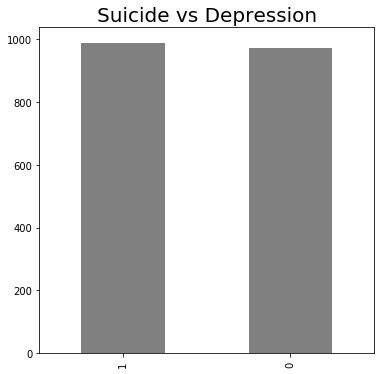

In [11]:
plt.figure(figsize=(6,6))
model_1k['is_suicidal'].value_counts().plot(kind='bar', color=['gray'])

plt.title('Suicide vs Depression', fontsize=20)

# Modelling Objective
---

Before analyzing models, I will do some housecleaning which consists of
1. Stating my scoring metric for evaluating the models
2. Updating my stopwords

## Choosing the Right Metric for evaluating classification models

There are several commonly used metrics in classification, namely:
1. Precision-Recall (F1 Score)
2. ROC-AUC
3. Accuracy
4. Log-loss

My business problem includes a time-element, where it is crucial that my model alerts to stakeholders which cases are suicidal, rather than depression cases. Both depression and suicidal cases are important and deserve attention, but one requires immediate prevention.

Thus, as the cost of false positive (predicted sudicial, but only depressed) and false negatives (predicted depression, but suicidal) are very different, it is better for my models to be evaulated on both Precision and Recall/Sensitivity, which is namely the F1 Score.

## Updating my stopwords

- Here, I set out to update my list of stopwords where I include words such as 'feel'/'feel like' as they commonly appear on both threads

In [12]:
#defining vocab, optimized after initial EDA
stops = set(stopwords.words('english'))
stops.update(['suicide','suicidal','depressed','depression','feel','like','feel like'])

## Rationalizing the Modelling Process

I will be following this training sequence when searching for the best classification models

1. Work on a classification model with un-tuned params with Count Vectorizer, then with TF-IDF
2. Perform GridSearch for the best Params
3. Re-train the model with the best Params with Count Vectorizer, then with TF-IDF

The models that I've choosen to test are:

1. Logistic Regression
    - Pros:
        1. Coefficients are easy to intrepret
    - Cons:
        1. Classical model where results are commonly used as a baseline reference.
        2. Requires a simple dataset where there are no multicollinearity between the independent variables and dataset is also linearly seperable.
2. Multinomial Naive Bayes
    - Pros:
        1. Especially for small sample sizes like our business case, Naive Bayes Classification is popular for outperforming other powerful models in Text Classification
        2. Not sensitive to irrelevant features
    - Cons:
        1. Value of co-efficient not directly interpretable. coef_ attribute of MultinomialNB is the log of the estimated probability of a feature given the positive class.
        2. Assumes that all the attributes are mutually independent, which in real life, is almost impossible
3. Extra Trees
    - Pros:
        1. Tapping on the capabilities of Decision Trees but with shorter computing time and lesser overfit
        2. Able to handle class imbalance and errors in dataset or outliers with accuracy
    - Cons: 
        1. May not perform well in high dimensional data-sets

# Logistic Regression: 63.47%

### Modeling

For all models, I will be running a defined Count Vectorizer and TF-IDF function on the feature columns

In [13]:
def cvec_lr_model(list_of_col):

    results_list = []
    for col in list_of_col:
    
    #features matrix(X) and target vector(y)
        X = model_1k[col]
        y = model_1k['is_suicidal']

        #train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                            stratify=y, 
                                                            random_state = 42)

        #instantiate cvec
        cvec = CountVectorizer(stop_words = stops, ngram_range=(1,2))

        #fit and transform
        X_train = cvec.fit_transform(X_train).todense()
        X_test = cvec.transform(X_test).todense()

        #instantiate log regression
        lr = LogisticRegression(max_iter=1000)

        #fit lr 
        lr.fit(X_train, y_train)

        #preds from lr model 
        pred = lr.predict(X_test)

        #generate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

        #create table of results using dictionary
        results = {}
        results['features matrix (X)'] = col
        results['model'] = 'cvec + logistic regression'
        results['train accuracy score'] = lr.score(X_train, y_train)
        results['test accuracy score'] = lr.score(X_test, y_test)
        results['confusion matrix'] = {'tn':tn, 'fp': fp, 'fn': fn, 'tp': tp}
        results['sensitivity'] = tp/(tp+fn)
        results['precision'] = tp/(tp+fp)
        results['train f1-score'] = f1_score(y_train, (lr.predict(X_train)))
        results['test f1-score'] = f1_score(y_test, pred)

        results 
        
        #append results dict to results_list
        results_list.append(results)
        
    #return dataframe of results for each model
    return(pd.DataFrame(results_list)).round(2)


- From the results, it is a clear overfit for all feature matrixes
- In terms of accuracy and f1 score, the combined feature matrix (selftext_title_clean) seem to give similar results with the body text (selftext_cleaned)

In [14]:
cvec_lr_model(['selftext_cleaned','title_cleaned','selftext_title_clean'])

,features matrix (X),model,train accuracy score,test accuracy score,confusion matrix,sensitivity,precision,train f1-score,test f1-score
0,selftext_cleaned,cvec + logistic regression,0.98,0.62,"{'tn': 131, 'fp': 112, 'fn': 75, 'tp': 172}",0.70,0.61,0.98,0.65
1,title_cleaned,cvec + logistic regression,0.94,0.57,"{'tn': 141, 'fp': 102, 'fn': 109, 'tp': 138}",0.56,0.57,0.94,0.57
2,selftext_title_clean,cvec + logistic regression,1.00,0.63,"{'tn': 144, 'fp': 99, 'fn': 83, 'tp': 164}",0.66,0.62,1.00,0.64


TF - IDF

In [15]:
def tvec_lr_model(list_of_col):

    results_list = []
    for col in list_of_col:
    
    #features matrix(X) and target vector(y)
        X = model_1k[col]
        y = model_1k['is_suicidal']

        #train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                            stratify=y, 
                                                            random_state = 42)

        #instantiate tvec
        tvec = TfidfVectorizer(stop_words = stops, ngram_range=(1,2))

        #fit and transform
        X_train = tvec.fit_transform(X_train).todense()
        X_test = tvec.transform(X_test).todense()

        #instantiate lr
        lr = LogisticRegression(max_iter=1000)

        #fit nb 
        lr.fit(X_train, y_train)

        #preds from lr model 
        pred = lr.predict(X_test)

        #generate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

        #create table of results using dictionary
        results = {}
        results['features matrix (X)'] = col
        results['model'] = 'tvec + logistic regression'
        results['train accuracy score'] = lr.score(X_train, y_train)
        results['test accuracy score'] = lr.score(X_test, y_test)
        results['confusion matrix'] = {'tn':tn, 'fp': fp, 'fn': fn, 'tp': tp}
        results['sensitivity'] = tp/(tp+fn)
        results['precision'] = tp/(tp+fp)
        results['train f1-score'] = f1_score(y_train, (lr.predict(X_train)))
        results['test f1-score'] = f1_score(y_test, pred)

        results 
        
        #append results dict to results_list
        results_list.append(results)
        
    #return dataframe of results for each model
    return(pd.DataFrame(results_list)).round(2)
    

- Comparing with the cvec version, there are very slight variations in the composition of results when focusing on the test accuracy and test f1-score
- We shall tune both models to see if a more pronounced difference will emerge so we can pick one version 

In [16]:
tvec_lr_model(['selftext_cleaned','title_cleaned','selftext_title_clean'])

,features matrix (X),model,train accuracy score,test accuracy score,confusion matrix,sensitivity,precision,train f1-score,test f1-score
0,selftext_cleaned,tvec + logistic regression,0.97,0.64,"{'tn': 161, 'fp': 82, 'fn': 96, 'tp': 151}",0.61,0.65,0.97,0.63
1,title_cleaned,tvec + logistic regression,0.92,0.56,"{'tn': 132, 'fp': 111, 'fn': 103, 'tp': 144}",0.58,0.56,0.92,0.57
2,selftext_title_clean,tvec + logistic regression,0.98,0.65,"{'tn': 168, 'fp': 75, 'fn': 96, 'tp': 151}",0.61,0.67,0.98,0.64


### Optimizing for Best Parameters

for CountVectorizer

In [17]:
#features matrix and target vector
#picking the combined feature matrix:selftext_title_clean
X = model_1k['selftext_title_clean']
y = model_1k['is_suicidal']

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, 
                                                    random_state = 42)

#optimising hyperparameters 
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=stops)),
    ('lr', LogisticRegression(solver = 'liblinear')) #use liblinear as it is a small dataset & binary classification
])

pipe_params = {
    'cvec__max_features': [2000,3000,4000,5000], #testing with a bigger text features as we're sieving through 2k posts
    'cvec__min_df': [2, 3, 4], #experimenting with a low range as I will like to retain most data
    'cvec__max_df': [0.85, 0.9, 0.95,1], #experimenting with a larger percentage as I will like to retain most data
    'cvec__ngram_range': [(1,1), (1,2), (1,3)], #through our eda, diffentiative words are mostly bigrams and tri-grams, thus testing it out
    'lr__penalty': ['l1', 'l2'],
    'lr__C': np.logspace(-5, 1, 10) #potential for overfitting, thus creating a range of bigger values
}

scoring = {'accuracy': make_scorer(accuracy_score), #creating a list of scoring metrics so I can switch them easily in case
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

gscv = GridSearchCV(pipe, pipe_params, n_jobs=-1, cv=5,verbose=1, scoring=scoring, refit='f1')
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   56.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [18]:
gscv.best_params_

{'cvec__max_df': 0.85,
 'cvec__max_features': 5000,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 3),
 'lr__C': 0.1,
 'lr__penalty': 'l2'}

In [19]:
#fitting model with optimised params 
best_gscv = gscv.best_estimator_
best_gscv.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.85,
                                 max_features=5000, min_df=3,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are'...
                                             'couldn', "couldn't", ...},
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
                 Lo

In [20]:
#create dataframe of metrics. 
#this will store all the results of our models' performance after being tuned by GridSearch
opt_results = pd.DataFrame()

opt_results['model'] = ['cvec + logistic regression']
opt_results['features_matrix'] = ['selftext_title_clean']
opt_results['optimised_params'] = [gscv.best_params_]
opt_results['train_score'] = best_gscv.score(X_train, y_train)
opt_results['test_score'] = best_gscv.score(X_test, y_test)

preds = best_gscv.predict(X_test)
tn, fp, fn, tp = cm = confusion_matrix(y_test, preds).ravel()

opt_results['confusion_matrix'] = [f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}']
opt_results['sensitivity'] = tp/(tp+fn)
opt_results['precision'] = tp/(tp+fp)

pred_proba = [i[1] for i in best_gscv.predict_proba(X_test)]

opt_results['train_f1'] = f1_score(y_train,(best_gscv.predict(X_train)))
opt_results['test_f1'] = f1_score(y_test, preds)

pd.set_option('display.max_colwidth', None)
opt_results = opt_results
opt_results

,model,features_matrix,optimised_params,train_score,test_score,confusion_matrix,sensitivity,precision,train_f1,test_f1
0,cvec + logistic regression,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 3), 'lr__C': 0.1, 'lr__penalty': 'l2'}",0.942059,0.646939,"tn: 154, fp: 89, fn: 84, tp: 163",0.659919,0.646825,0.943968,0.653307


for TF-IDF

In [21]:
#features matrix and target vector
X = model_1k['selftext_title_clean']
y = model_1k['is_suicidal']

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, 
                                                    random_state = 42)

#optimising hyperparameters 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stops)),
    ('lr', LogisticRegression(solver = 'liblinear')) #use liblinear as it is a small dataset & binary classification
])

pipe_params = {
    'tvec__max_features': [2000,3000,4000,5000],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [0.85, 0.9, 0.95,1],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)],
    'lr__penalty': ['l1', 'l2'],
    'lr__C': np.logspace(-5, 1, 10)
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

gstv = GridSearchCV(pipe, pipe_params, n_jobs=-1, cv=5,verbose=1, scoring=scoring, refit='f1')
gstv.fit(X_train, y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 6042 tasks      | elapsed: 17.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done 8442 tasks      | elapsed: 24.0min
[Parallel(n_jobs=-1)]: Done 9792 tasks      | elapsed: 27.8min
[Parallel(n_jobs=-1)]: Done 11242 tasks      |

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [22]:
gstv.best_params_

{'lr__C': 0.021544346900318822,
 'lr__penalty': 'l2',
 'tvec__max_df': 0.85,
 'tvec__max_features': 3000,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 3)}

In [23]:
#fitting model with optimised params 
best_gstv = gstv.best_estimator_
best_gstv.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=3000,
                                 min_df=4, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all'...
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('lr',
                 LogisticRegression(C=0.021544346900318822, class_weight=None,
                                  

- **Best Log Model Pick: TVEC**
- By sacrificing slightly (by 1%) on accuracy, TVEC Log Reg version gives an increase in 3% from the test f1 score, which is our main metric.
- TVEC's version also showed less overfit

In [24]:
tvpreds = best_gstv.predict(X_test)
tn, fp, fn, tp = cm = confusion_matrix(y_test, tvpreds).ravel()

pred_proba = [i[1] for i in best_gstv.predict_proba(X_test)]

#create dataframe of metrics based on optimised model 
opt_results_tveclogres = pd.DataFrame({"model" : ['tvec + logistic regression'],
                               "features_matrix": "selftext_title_clean",
                               "optimised_params": [gstv.best_params_],
                               "train_score" : [best_gstv.score(X_train, y_train)],
                               "test_score" :[best_gstv.score(X_test, y_test)],
                               "confusion_matrix" : [f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}'],
                               "sensitivity" : [tp/(tp+fn)],
                               "precision" : [tp/(tp+fp)],
                               "train_f1": [f1_score(y_train, (best_gstv.predict(X_train)))],
                               "test_f1" : [f1_score(y_test,tvpreds)]})

results_df = pd.concat([opt_results, opt_results_tveclogres], ignore_index=True)
results_df

,model,features_matrix,optimised_params,train_score,test_score,confusion_matrix,sensitivity,precision,train_f1,test_f1
0,cvec + logistic regression,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 3), 'lr__C': 0.1, 'lr__penalty': 'l2'}",0.942059,0.646939,"tn: 154, fp: 89, fn: 84, tp: 163",0.659919,0.646825,0.943968,0.653307
1,tvec + logistic regression,selftext_title_clean,"{'lr__C': 0.021544346900318822, 'lr__penalty': 'l2', 'tvec__max_df': 0.85, 'tvec__max_features': 3000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.770279,0.634694,"tn: 120, fp: 123, fn: 56, tp: 191",0.773279,0.608280,0.796620,0.680927


### Insights from TVEC Log Regression

In [25]:
#finding coefficients of 3000 most siginificant features from model 
coefs_tv = best_gstv.named_steps['lr'].coef_
coefs_tv.shape

(1, 3000)

In [26]:
tvfeatures = best_gstv.named_steps['tvec'].get_feature_names()
len(tvfeatures)

3000

In [27]:
#creating dataframe of words and coefficients 
tvcoef_df = pd.DataFrame({'word':tvfeatures, 'coef':coefs_tv[0]})

- This ranks the words according to how sigificant its role in predicting the target class

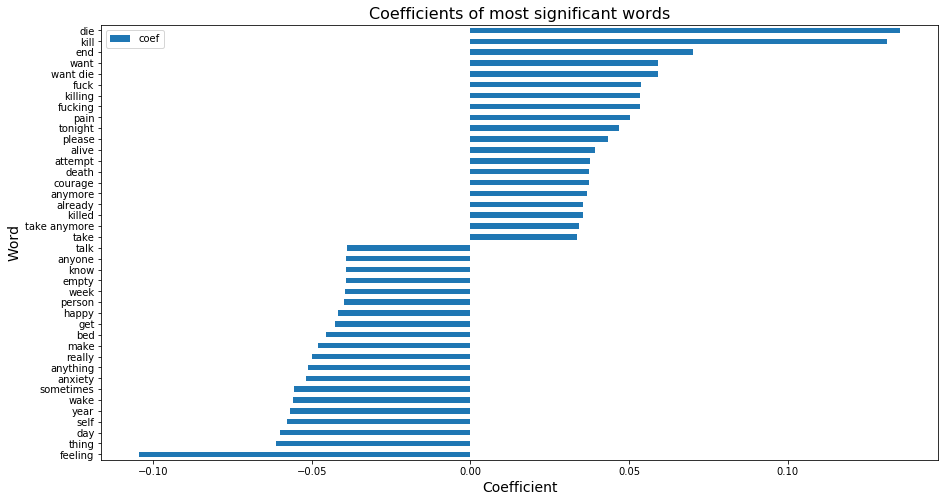

In [28]:
#words with largest positive coefficient values 
top_20 = tvcoef_df.sort_values(by = 'coef', ascending = False)[0:20]

#words with largest negative coefficient values 
bottom_20 = tvcoef_df.sort_values(by = 'coef')[0:20] 

top_bottom_20 = pd.concat([bottom_20, top_20.sort_values(by = 'coef')], axis =0)

#plot bar chart with 20 words with largest coefficient values and 20 words with smallest coefficient values 
top_bottom_20.plot.barh('word', figsize=(15,8))
plt.title ('Coefficients of most significant words', fontsize=16)
plt.xlabel('Coefficient', fontsize = 14)
plt.ylabel('Word', fontsize = 14);

- Printing the top and bottom values, we see that the top words which have the largest positive values are:
    1. die : As the word count of 'die' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 13.5%
    2. kill : As the word count of 'kill' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 13.1%
    3. end : As the word count of 'end' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 7%
    4. want die: As the word count of 'want die' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 6%
    
    These words positively affect the probability of 'is_suicidal' the most. 
    
- On the contrary, these words negatively affect the probability of being assigned under r/SuicidalWatch. These words increase the chances of the model assigning it to be under r/depression

    1. feeling : As the word count of 'feeling' increases by 1, the probability of the model classifying the post under r/SuicidalWatch decreases by 10%
    2. thing : As the word count of 'thing' increases by 1, the probability of the model classifying the post under r/SuicidalWatch decreases by 6%
    3. day : As the word count of 'day' increases by 1, the probability of the model classifying the post under r/SuicidalWatch decreases by 6%
    4. self: As the word count of 'self' increases by 1, the probability of the model classifying the post under r/SuicidalWatch decreases by 5.7%

In [29]:
top_bottom_20

,word,coef
878,feeling,-0.104242
2543,thing,-0.061392
546,day,-0.059968
2207,self,-0.057754
2972,year,-0.056980
2773,wake,-0.055800
2334,sometimes,-0.055671
105,anxiety,-0.051925
129,anything,-0.051278
2054,really,-0.050030


### Log Reg Conclusion

Log Reg results gels with our EDA analysis made earlier, where Suicidal authors uses more intense language with hints of finality and desoluteness. Depression authors tend to use more contextual, emotive words as most of their posts are life event recounts and story-based.

# Multi Naive Bayes: 67.34%

### Modeling

Count Vectorizer

In [30]:
def cvec_nb_model(list_of_col):

    results_list = []
    for col in list_of_col:
    
    #features matrix(X) and target vector(y)
        X = model_1k[col]
        y = model_1k['is_suicidal']

        #train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                            stratify=y, 
                                                            random_state = 42)

        #instantiate cvec
        cvec = CountVectorizer(stop_words = stops, ngram_range=(1,2))

        #fit and transform
        X_train = cvec.fit_transform(X_train).todense()
        X_test = cvec.transform(X_test).todense()

        #instantiate multinomial nb
        nb = MultinomialNB()

        #fit nb 
        nb.fit(X_train, y_train)

        #preds from nb model 
        pred = nb.predict(X_test)

        #generate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()


        #create table of results using dictionary
        results = {}
        results['features matrix (X)'] = col
        results['model'] = 'cvec + multinomial nb'
        results['train accuracy score'] = nb.score(X_train, y_train)
        results['test accuracy score'] = nb.score(X_test, y_test)
        results['confusion matrix'] = {'tn':tn, 'fp': fp, 'fn': fn, 'tp': tp}
        results['sensitivity'] = tp/(tp+fn)
        results['precision'] = tp/(tp+fp)
        results['train f1-score'] = f1_score(y_train,(nb.predict(X_train)))
        results['test f1-score'] = f1_score(y_test,pred)

        results 
        
        #append results dict to results_list
        results_list.append(results)
        
    #return dataframe of results for each model
    return(pd.DataFrame(results_list)).round(2)


In [31]:
cvec_nb_model(['selftext_cleaned', 'title_cleaned', 'selftext_title_clean'])

,features matrix (X),model,train accuracy score,test accuracy score,confusion matrix,sensitivity,precision,train f1-score,test f1-score
0,selftext_cleaned,cvec + multinomial nb,0.98,0.64,"{'tn': 179, 'fp': 64, 'fn': 113, 'tp': 134}",0.54,0.68,0.98,0.60
1,title_cleaned,cvec + multinomial nb,0.92,0.57,"{'tn': 119, 'fp': 124, 'fn': 86, 'tp': 161}",0.65,0.56,0.92,0.61
2,selftext_title_clean,cvec + multinomial nb,0.99,0.63,"{'tn': 177, 'fp': 66, 'fn': 114, 'tp': 133}",0.54,0.67,0.99,0.60


TD - IDF

In [32]:
def tvec_nb_model(list_of_col):

    results_list = []
    for col in list_of_col:
    
        #features matrix(X) and target vector(y)
        X = model_1k[col]
        y = model_1k['is_suicidal']

        #train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                            stratify=y, 
                                                            random_state = 42)

        #instantiate tvec
        tvec = TfidfVectorizer(stop_words = stops, ngram_range=(1,2))
    

        #fit and transform
        X_train = tvec.fit_transform(X_train).todense()
        X_test = tvec.transform(X_test).todense()

        #instantiate multinomial nb
        nb = MultinomialNB()

        #fit nb 
        nb.fit(X_train, y_train)

        #preds from nb model 
        pred = nb.predict(X_test)

        #generate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

        #create table of results using dictionary
        results = {}
        results['features matrix (X)'] = col
        results['model'] = 'tvec + multinomial nb'
        results['train accuracy score'] = nb.score(X_train, y_train)
        results['test accuracy score'] = nb.score(X_test, y_test)
        results['confusion matrix'] = {'tn':tn, 'fp': fp, 'fn': fn, 'tp': tp}
        results['sensitivity'] = tp/(tp+fn)
        results['precision'] = tp/(tp+fp)
        results['train f1-score'] = f1_score(y_train,(nb.predict(X_train)))
        results['test f1-score'] = f1_score(y_test,pred)
        results 
        
        #append results dict to results_list
        results_list.append(results)
    
    #return dataframe of results for each model 
    return(pd.DataFrame(results_list)).round(2)

- With respect to accuracy and f1scores on test set, TVEC version for MultiNB seems to be doing better at this moment

In [33]:
tvec_nb_model(['selftext_cleaned', 'title_cleaned', 'selftext_title_clean'])

,features matrix (X),model,train accuracy score,test accuracy score,confusion matrix,sensitivity,precision,train f1-score,test f1-score
0,selftext_cleaned,tvec + multinomial nb,0.98,0.64,"{'tn': 186, 'fp': 57, 'fn': 119, 'tp': 128}",0.52,0.69,0.98,0.59
1,title_cleaned,tvec + multinomial nb,0.93,0.55,"{'tn': 112, 'fp': 131, 'fn': 89, 'tp': 158}",0.64,0.55,0.93,0.59
2,selftext_title_clean,tvec + multinomial nb,0.99,0.65,"{'tn': 181, 'fp': 62, 'fn': 109, 'tp': 138}",0.56,0.69,0.99,0.62


### Optimizing for Best Parameters

Count Vect

In [34]:
#features matrix and target vector
X = model_1k['selftext_title_clean']
y = model_1k['is_suicidal']

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, 
                                                    random_state = 42)

#optimising hyperparameters 
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=stops)),
    ('nb', MultinomialNB())
])

pipe_params = {
    'cvec__max_features': [2000,3000,4000,5000],  
    'cvec__min_df': [2,3,4],
    'cvec__max_df': [0.85, 0.9, 0.95,1],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)]
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}


gscvnb = GridSearchCV(pipe, pipe_params, cv=5, n_jobs =-1, verbose=1,scoring=scoring, refit='f1')
gscvnb.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [35]:
gscvnb.best_params_

{'cvec__max_df': 0.85,
 'cvec__max_features': 2000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2)}

In [36]:
#fitting model with optimised params 
best_gscvnb = gscvnb.best_estimator_
best_gscvnb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.85,
                                 max_features=2000, min_df=2,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
                                             'both', 'but', 'by', 'can',
    

In [37]:
cvnbpreds = best_gscvnb.predict(X_test)
tn, fp, fn, tp = cm = confusion_matrix(y_test, cvnbpreds).ravel()

pred_proba = [i[1] for i in best_gscvnb.predict_proba(X_test)]

#adding results to the dataframe 
opt_results_cvecnb = pd.DataFrame({"model" : ['cvec + multi nb'],
                               "features_matrix": "selftext_title_clean",
                               "optimised_params": [gscvnb.best_params_],
                               "train_score" : [best_gscvnb.score(X_train, y_train)],
                               "test_score" :[best_gscvnb.score(X_test, y_test)],
                               "confusion_matrix" : [f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}'],
                               "sensitivity" : [tp/(tp+fn)],
                               "precision" : [tp/(tp+fp)],
                               "train_f1": [f1_score(y_train,(best_gscvnb.predict(X_train)))],
                               "test_f1" : [f1_score(y_test,cvnbpreds)]})

results_df = pd.concat([results_df, opt_results_cvecnb], ignore_index=True)
results_df

,model,features_matrix,optimised_params,train_score,test_score,confusion_matrix,sensitivity,precision,train_f1,test_f1
0,cvec + logistic regression,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 3), 'lr__C': 0.1, 'lr__penalty': 'l2'}",0.942059,0.646939,"tn: 154, fp: 89, fn: 84, tp: 163",0.659919,0.646825,0.943968,0.653307
1,tvec + logistic regression,selftext_title_clean,"{'lr__C': 0.021544346900318822, 'lr__penalty': 'l2', 'tvec__max_df': 0.85, 'tvec__max_features': 3000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.770279,0.634694,"tn: 120, fp: 123, fn: 56, tp: 191",0.773279,0.608280,0.796620,0.680927
2,cvec + multi nb,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}",0.813224,0.659184,"tn: 155, fp: 88, fn: 79, tp: 168",0.680162,0.656250,0.822078,0.667992


TD-IDF

In [38]:
#features matrix and target vector
X = model_1k['selftext_title_clean']
y = model_1k['is_suicidal']

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, 
                                                    random_state = 42)

#optimising hyperparameters 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stops)),
    ('nb', MultinomialNB()) 
])

pipe_params = {
    'tvec__max_features': [2000,3000,4000,5000],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [0.85, 0.9, 0.95,1],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)],
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

gstvnb = GridSearchCV(pipe, pipe_params, n_jobs=-1, cv=5,verbose=1, scoring=scoring, refit='f1')
gstvnb.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed:  2.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [39]:
gstvnb.best_params_

{'tvec__max_df': 0.85,
 'tvec__max_features': 2000,
 'tvec__min_df': 3,
 'tvec__ngram_range': (1, 1)}

In [40]:
#fitting model with optimised params 
best_gstvnb = gstvnb.best_estimator_
best_gstvnb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.85, max_features=2000,
                                 min_df=3, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are',
                                             'aren', "aren't", 'as', 'at', 'be',
                                             'because', 'been', 'before',
                                             'being', 'below', 'between',
              

- **Best NB Model Pick: TVEC**
- When comparing between the models (Log Reg and Multi-NB), Multi-NB returns higher accuracy and f1-score for both CVEC and TVEC versions
- When comparing between CVEC and TVEC versions of the Multi-NB model, TVEC version outperforms the CVEC by ~2% on every metric

In [41]:
tvnbpreds = best_gstvnb.predict(X_test)
tn, fp, fn, tp = cm = confusion_matrix(y_test, tvnbpreds).ravel()

pred_proba = [i[1] for i in best_gstvnb.predict_proba(X_test)]

#saving optimized performance to the dataframe
opt_results_tvecnb = pd.DataFrame({"model" : ['tvec + multi nb'],
                               "features_matrix": "selftext_title_clean",
                               "optimised_params": [gstvnb.best_params_],
                               "train_score" : [best_gstvnb.score(X_train, y_train)],
                               "test_score" :[best_gstvnb.score(X_test, y_test)],
                               "confusion_matrix" : [f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}'],
                               "sensitivity" : [tp/(tp+fn)],
                               "precision" : [tp/(tp+fp)],
                               "train_f1": [f1_score(y_train,(best_gstvnb.predict(X_train)))],
                               "test_f1" : [f1_score(y_test,tvnbpreds)]})

results_df = pd.concat([results_df, opt_results_tvecnb], ignore_index=True)
results_df

,model,features_matrix,optimised_params,train_score,test_score,confusion_matrix,sensitivity,precision,train_f1,test_f1
0,cvec + logistic regression,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 3), 'lr__C': 0.1, 'lr__penalty': 'l2'}",0.942059,0.646939,"tn: 154, fp: 89, fn: 84, tp: 163",0.659919,0.646825,0.943968,0.653307
1,tvec + logistic regression,selftext_title_clean,"{'lr__C': 0.021544346900318822, 'lr__penalty': 'l2', 'tvec__max_df': 0.85, 'tvec__max_features': 3000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.770279,0.634694,"tn: 120, fp: 123, fn: 56, tp: 191",0.773279,0.608280,0.796620,0.680927
2,cvec + multi nb,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}",0.813224,0.659184,"tn: 155, fp: 88, fn: 79, tp: 168",0.680162,0.656250,0.822078,0.667992
3,tvec + multi nb,selftext_title_clean,"{'tvec__max_df': 0.85, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1)}",0.853442,0.673469,"tn: 154, fp: 89, fn: 71, tp: 176",0.712551,0.664151,0.859201,0.687500


### Insights from TVEC Multi NB Model

In [42]:
#finding coefficients of 2000 most siginificant features from model 
coefs = best_gstvnb.named_steps['nb'].coef_
coefs.shape

(1, 2000)

In [43]:
features = best_gstvnb.named_steps['tvec'].get_feature_names()
len(features)

2000

In [44]:
#creating dataframe of words and coefficients 
coef_df = pd.DataFrame({'word':features, 'coef':coefs[0]})
coef_df.head()

,word,coef
0,abandoned,-8.277905
1,ability,-8.339621
2,able,-6.867182
3,absolute,-8.186464
4,absolutely,-7.563637


 - The graph below shows the value siginficance of the words in predicting the target class
 - Unlike the Log Reg model coeff values, Multi NB returns the log of the estimated proobability of a feature given the positive class. Thus, the bigger the value, the more likely the post will be labelled as a r/SuicideWatch post, rather than a r/depression post
 
 - Printing the top and bottom values, we see that the top words which have the largest positive values are:
    1. want : As the word count of 'want' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-5.003002)%
    2. life : As the word count of 'life' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-5.233649)%
    3. know : As the word count of 'know' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-5.424592)%
    4. die: As the word count of 'die' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-5.454640)%
    
    These words significantly increase the probability of a post being labelled 'is_suicidal' the most. 
    
- On the contrary, these words have the least predictive power in being  assigned to r/SuicidalWatch. 

    1. coffee : As the word count of 'coffee' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-8.707478)%
    2. customer : As the word count of 'customer' increase by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-8.707478)%
    3. gp : As the word count of 'gp' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-8.707478)%
    4. required: As the word count of 'required' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by exp(-8.707478)%

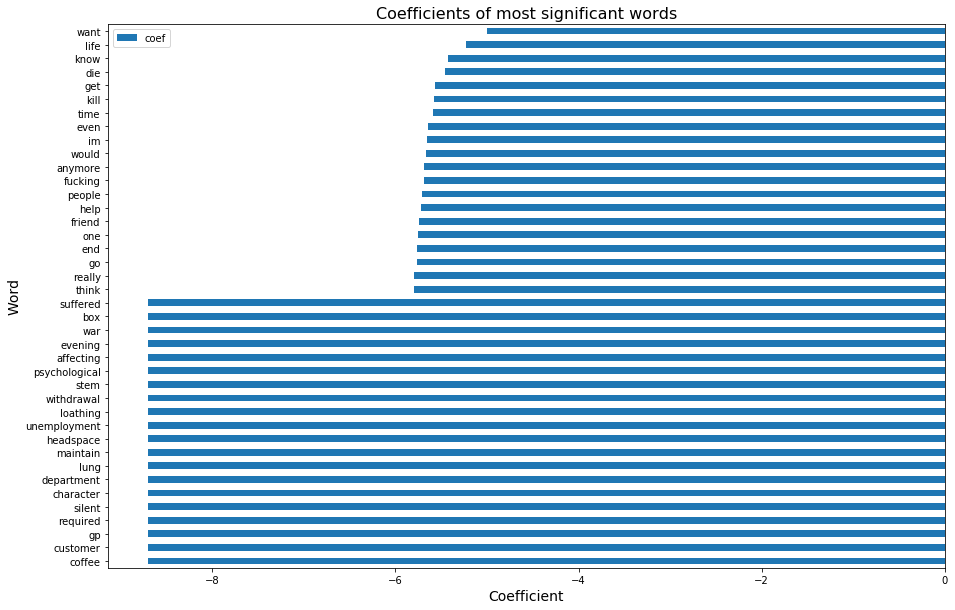

In [45]:
#words with largest negative coefficient values 
bottom_20 = coef_df.sort_values(by = 'coef')[0:20] 

#words with smallest negative coefficient values 
top_20 = coef_df.sort_values(by = 'coef', ascending = False)[0:20]

top_bottom_20 = pd.concat([bottom_20, top_20.sort_values(by = 'coef')], axis =0)

#plot bar chart with 20 words with largest coefficient values and 20 words with smallest coefficient values 
top_bottom_20.plot.barh('word', figsize=(15,10))
plt.title ('Coefficients of most significant words', fontsize=16)
plt.xlabel('Coefficient', fontsize = 14)
plt.ylabel('Word', fontsize = 14);

In [46]:
top_bottom_20

,word,coef
319,coffee,-8.707478
415,customer,-8.707478
758,gp,-8.707478
1455,required,-8.707478
1578,silent,-8.707478
279,character,-8.707478
456,department,-8.707478
1063,lung,-8.707478
1070,maintain,-8.707478
817,headspace,-8.707478


In [47]:
#printing out the actual value for the coeff "coffee"
np.exp(-8.707478)

0.00016534472848403795

In [48]:
#printing out the actual value for the coeff "life"
np.exp(-5.233649)

0.005334025887150645

### Multi NB Conclusion

- Although the top predictive words are slightly different and all in 1-gram, findings from this model substantiate the analysis provided by Log Reg model. 
    1. Strong predictors are words of intensity and desire to die, ie 'want' 'life' 'die'
    2. Weak predictors are contextual based, ie 'gp', 'coffee'
- Multi NB model, as commonly known for this prowess in text classification, has proven to be the better model than Log Reg

# Extra Tree: 64.90%

### Modeling
Count Vectorizer

In [49]:
def cvec_et_model(list_of_col):

    results_list = []
    for col in list_of_col:
    
    #features matrix(X) and target vector(y)
        X = model_1k[col]
        y = model_1k['is_suicidal']

        #train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                            stratify=y, 
                                                            random_state = 42)

        #instantiate cvec
        cvec = CountVectorizer(stop_words=stops)

        #fit and transform
        X_train = cvec.fit_transform(X_train).todense()
        X_test = cvec.transform(X_test).todense()

        #instantiate extra tree classifier
        et = ExtraTreesClassifier()

        #fit et 
        et.fit(X_train, y_train)

        #preds from et model 
        pred = et.predict(X_test)

        #generate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

        #create table of results using dictionary
        results = {}
        results['features matrix (X)'] = col
        results['model'] = 'cvec + extra tree classifier'
        results['train accuracy score'] = et.score(X_train, y_train)
        results['test accuracy score'] = et.score(X_test, y_test)
        results['confusion matrix'] = {'tn':tn, 'fp': fp, 'fn': fn, 'tp': tp}
        results['sensitivity'] = tp/(tp+fn)
        results['precision'] = tp/(tp+fp)
        results['train f1-score'] = f1_score(y_train,(et.predict(X_train)))
        results['test f1-score'] = f1_score(y_test,pred)

        results 
        
        #append results dict to results_list
        results_list.append(results)
        
    #return dataframe of results for each model
    return(pd.DataFrame(results_list)).round(2)


In [50]:
cvec_et_model(['selftext_cleaned', 'title_cleaned', 'selftext_title_clean'])

,features matrix (X),model,train accuracy score,test accuracy score,confusion matrix,sensitivity,precision,train f1-score,test f1-score
0,selftext_cleaned,cvec + extra tree classifier,0.98,0.63,"{'tn': 171, 'fp': 72, 'fn': 108, 'tp': 139}",0.56,0.66,0.98,0.61
1,title_cleaned,cvec + extra tree classifier,0.96,0.56,"{'tn': 156, 'fp': 87, 'fn': 129, 'tp': 118}",0.48,0.58,0.96,0.52
2,selftext_title_clean,cvec + extra tree classifier,1.00,0.64,"{'tn': 165, 'fp': 78, 'fn': 100, 'tp': 147}",0.60,0.65,1.00,0.62


TF-IDF

In [51]:
def tvec_et_model(list_of_col):

    results_list = []
    for col in list_of_col:
    
    #features matrix(X) and target vector(y)
        X = model_1k[col]
        y = model_1k['is_suicidal']

        #train-test-split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                            stratify=y, 
                                                            random_state = 42)

        #instantiate tvec
        tvec = TfidfVectorizer(stop_words=stops)

        #fit and transform
        X_train = tvec.fit_transform(X_train).toarray()
        X_test = tvec.transform(X_test).toarray()

        #instantiate et model
        et = ExtraTreesClassifier()

        #fit nb 
        et.fit(X_train, y_train)

        #preds from et model 
        pred = et.predict(X_test)

        #generate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()

        #create table of results using dictionary
        results = {}
        results['features matrix (X)'] = col
        results['model'] = 'tvec + extra trees'
        results['train accuracy score'] = et.score(X_train, y_train)
        results['test accuracy score'] = et.score(X_test, y_test)
        results['confusion matrix'] = {'tn':tn, 'fp': fp, 'fn': fn, 'tp': tp}
        results['sensitivity'] = tp/(tp+fn)
        results['precision'] = tp/(tp+fp)
        results['train f1-score'] = f1_score(y_train,(et.predict(X_train)))
        results['test f1-score'] = f1_score(y_test,pred)

        results 
        
        #append results dict to results_list
        results_list.append(results)
        
    #return dataframe of results for each model
    return(pd.DataFrame(results_list)).round(2)


In [52]:
tvec_et_model(['selftext_cleaned', 'title_cleaned', 'selftext_title_clean'])

,features matrix (X),model,train accuracy score,test accuracy score,confusion matrix,sensitivity,precision,train f1-score,test f1-score
0,selftext_cleaned,tvec + extra trees,0.98,0.63,"{'tn': 165, 'fp': 78, 'fn': 105, 'tp': 142}",0.57,0.65,0.98,0.61
1,title_cleaned,tvec + extra trees,0.96,0.56,"{'tn': 145, 'fp': 98, 'fn': 118, 'tp': 129}",0.52,0.57,0.96,0.54
2,selftext_title_clean,tvec + extra trees,1.00,0.62,"{'tn': 163, 'fp': 80, 'fn': 105, 'tp': 142}",0.57,0.64,1.00,0.61


### Optimizing params (Count Vectorizer) 

Count Vectorizer

In [53]:
#features matrix and target vector
X = model_1k['selftext_title_clean']
y = model_1k['is_suicidal']

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, 
                                                    random_state = 42)

#optimising hyperparameters 
pipe = Pipeline([
    ('cvec', CountVectorizer(stop_words=stops)),
    ('et', ExtraTreesClassifier())
])

pipe_params = {
    'cvec__max_features': [2000,3000,4000,5000],
    'cvec__min_df': [2, 3, 4],
    'cvec__max_df': [0.85, 0.9, 0.95,1],
    'cvec__ngram_range': [(1,1), (1,2), (1,3)],
    'et__n_estimators': [90,100,110],
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

gscvet = GridSearchCV(pipe, pipe_params, cv=5, n_jobs = -1, verbose=1,scoring=scoring, refit='f1')
gscvet.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 16.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [54]:
gscvet.best_params_

{'cvec__max_df': 0.95,
 'cvec__max_features': 5000,
 'cvec__min_df': 4,
 'cvec__ngram_range': (1, 2),
 'et__n_estimators': 110}

In [55]:
#fitting model with optimised params 
best_gscvet = gscvet.best_estimator_
best_gscvet.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.95,
                                 max_features=5000, min_df=4,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',
                                             'am', 'an', 'and', 'any', 'are'...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
       

In [56]:
cvetpreds = best_gscvet.predict(X_test)
tn, fp, fn, tp = cm = confusion_matrix(y_test, cvetpreds).ravel()

pred_proba = [i[1] for i in best_gscvet.predict_proba(X_test)]

#adding optimized performance to the dataframe
opt_results_cvecet = pd.DataFrame({"model" : ['cvec + extra trees'],
                               "features_matrix": "selftext_title_clean",
                               "optimised_params": [gscvet.best_params_],
                               "train_score" : [best_gscvet.score(X_train, y_train)],
                               "test_score" :[best_gscvet.score(X_test, y_test)],
                               "confusion_matrix" : [f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}'],
                               "sensitivity" : [tp/(tp+fn)],
                               "precision" : [tp/(tp+fp)],
                               "train_f1": [f1_score(y_train,(best_gscvet.predict(X_train)))],
                               "test_f1" : [f1_score(y_test,cvetpreds)]})

results_df = pd.concat([results_df, opt_results_cvecet], ignore_index=True)
results_df

,model,features_matrix,optimised_params,train_score,test_score,confusion_matrix,sensitivity,precision,train_f1,test_f1
0,cvec + logistic regression,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 3), 'lr__C': 0.1, 'lr__penalty': 'l2'}",0.942059,0.646939,"tn: 154, fp: 89, fn: 84, tp: 163",0.659919,0.646825,0.943968,0.653307
1,tvec + logistic regression,selftext_title_clean,"{'lr__C': 0.021544346900318822, 'lr__penalty': 'l2', 'tvec__max_df': 0.85, 'tvec__max_features': 3000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.770279,0.634694,"tn: 120, fp: 123, fn: 56, tp: 191",0.773279,0.608280,0.796620,0.680927
2,cvec + multi nb,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}",0.813224,0.659184,"tn: 155, fp: 88, fn: 79, tp: 168",0.680162,0.656250,0.822078,0.667992
3,tvec + multi nb,selftext_title_clean,"{'tvec__max_df': 0.85, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1)}",0.853442,0.673469,"tn: 154, fp: 89, fn: 71, tp: 176",0.712551,0.664151,0.859201,0.687500
4,cvec + extra trees,selftext_title_clean,"{'cvec__max_df': 0.95, 'cvec__max_features': 5000, 'cvec__min_df': 4, 'cvec__ngram_range': (1, 2), 'et__n_estimators': 110}",0.996592,0.618367,"tn: 163, fp: 80, fn: 107, tp: 140",0.566802,0.636364,0.996610,0.599572


TD-IDF

In [57]:
#features matrix and target vector
X = model_1k['selftext_title_clean']
y = model_1k['is_suicidal']

#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, 
                                                    random_state = 42)

#optimising hyperparameters 
pipe = Pipeline([
    ('tvec', TfidfVectorizer(stop_words=stops)),
    ('et', ExtraTreesClassifier()) 
])

pipe_params = {
    'tvec__max_features': [2000,3000,4000,5000],
    'tvec__min_df': [2, 3, 4],
    'tvec__max_df': [0.85, 0.9, 0.95,1],
    'tvec__ngram_range': [(1,1), (1,2), (1,3)],
    'et__n_estimators': [90,100,110],
}

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'f1': make_scorer(f1_score)}

gstvet = GridSearchCV(pipe, pipe_params, n_jobs=-1, cv=5,verbose=1, scoring=scoring, refit='f1')
gstvet.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 15.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [58]:
gstvet.best_params_

{'et__n_estimators': 110,
 'tvec__max_df': 0.9,
 'tvec__max_features': 4000,
 'tvec__min_df': 4,
 'tvec__ngram_range': (1, 3)}

In [59]:
#fitting model with optimised params 
best_gstvet = gstvet.best_estimator_
best_gstvet.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tvec',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=4000,
                                 min_df=4, ngram_range=(1, 3), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words={'a', 'about', 'above', 'after',
                                             'again', 'against', 'ain', 'all',...
                 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                      class_weight=None, criterion='gini',
                                      max_depth=None, max_features='auto',
                                      max_leaf_nodes=None, max_samples=None,
                      

- Looking at the combined dataframe, Extra Trees TVEC scored better in accuracy and f1 Score than Extra Trees CVEC
- Looking specifically at TVEC versions across the models
    - MultiNB scores highest in both accuracy and f1 score
    - Extra Trees perform ~1% higher in test accuracy score, but 6% lower in test f1 score


In [60]:
tvetpreds = best_gstvet.predict(X_test)
tn, fp, fn, tp = cm = confusion_matrix(y_test, tvetpreds).ravel()

pred_proba = [i[1] for i in best_gstvet.predict_proba(X_test)]

#adding optimized performance score to the dataframe
opt_results_tvecet = pd.DataFrame({"model" : ['tvec + extra trees'],
                               "features_matrix": "selftext_title_clean",
                               "optimised_params": [gstvet.best_params_],
                               "train_score" : [best_gstvet.score(X_train, y_train)],
                               "test_score" :[best_gstvet.score(X_test, y_test)],
                               "confusion_matrix" : [f'tn: {tn}, fp: {fp}, fn: {fn}, tp: {tp}'],
                               "sensitivity" : [tp/(tp+fn)],
                               "precision" : [tp/(tp+fp)],
                               "train_f1": [f1_score(y_train, best_gstvet.predict(X_train))],
                               "test_f1" : [f1_score(y_test,tvetpreds)]})

results_df = pd.concat([results_df, opt_results_tvecet], ignore_index=True)
results_df

,model,features_matrix,optimised_params,train_score,test_score,confusion_matrix,sensitivity,precision,train_f1,test_f1
0,cvec + logistic regression,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 3), 'lr__C': 0.1, 'lr__penalty': 'l2'}",0.942059,0.646939,"tn: 154, fp: 89, fn: 84, tp: 163",0.659919,0.646825,0.943968,0.653307
1,tvec + logistic regression,selftext_title_clean,"{'lr__C': 0.021544346900318822, 'lr__penalty': 'l2', 'tvec__max_df': 0.85, 'tvec__max_features': 3000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.770279,0.634694,"tn: 120, fp: 123, fn: 56, tp: 191",0.773279,0.608280,0.796620,0.680927
2,cvec + multi nb,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}",0.813224,0.659184,"tn: 155, fp: 88, fn: 79, tp: 168",0.680162,0.656250,0.822078,0.667992
3,tvec + multi nb,selftext_title_clean,"{'tvec__max_df': 0.85, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1)}",0.853442,0.673469,"tn: 154, fp: 89, fn: 71, tp: 176",0.712551,0.664151,0.859201,0.687500
4,cvec + extra trees,selftext_title_clean,"{'cvec__max_df': 0.95, 'cvec__max_features': 5000, 'cvec__min_df': 4, 'cvec__ngram_range': (1, 2), 'et__n_estimators': 110}",0.996592,0.618367,"tn: 163, fp: 80, fn: 107, tp: 140",0.566802,0.636364,0.996610,0.599572
5,tvec + extra trees,selftext_title_clean,"{'et__n_estimators': 110, 'tvec__max_df': 0.9, 'tvec__max_features': 4000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.996592,0.648980,"tn: 172, fp: 71, fn: 101, tp: 146",0.591093,0.672811,0.996610,0.629310


### Insights from TVEC Extra Trees

In [61]:
#finding coefficients of 4000 most siginificant features from model 
feature_impt = best_gscvet.named_steps['et'].feature_importances_
features = best_gscvet.named_steps['cvec'].get_feature_names()

#creating dataframe of words and feature importance
feat_df = pd.DataFrame({'word':features, 'feature_impt':feature_impt})
feat_df.head()

,word,feature_impt
0,abandoned,0.000078
1,ability,0.000841
2,able,0.001001
3,able enjoy,0.000045
4,able function,0.000047


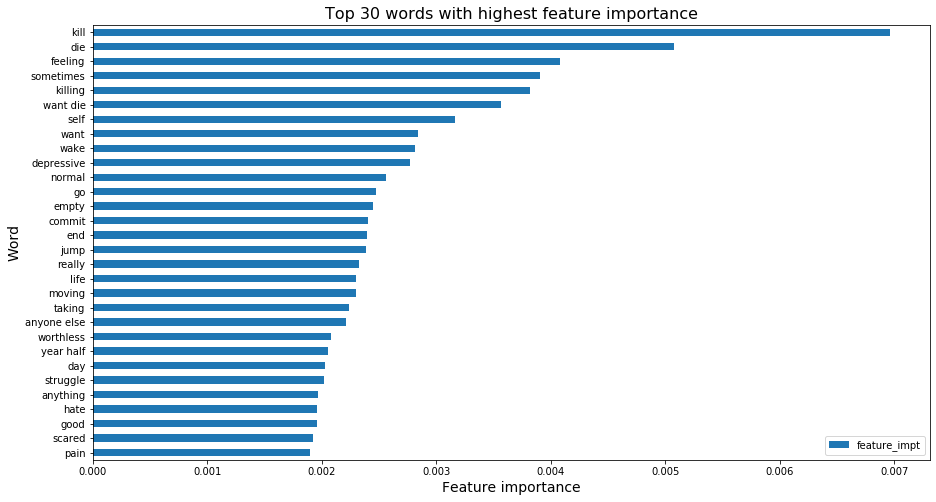

In [62]:
#plot bar chart with 30 words with highest feature importance
top_30 = feat_df.sort_values(by = 'feature_impt', ascending=False)[:30]
top_30[::-1].plot.barh('word', figsize=(15,8))
plt.title ('Top 30 words with highest feature importance', fontsize=16)
plt.xlabel('Feature importance', fontsize = 14)
plt.ylabel('Word', fontsize = 14);

In [63]:
top_30

,word,feature_impt
2209,kill,0.006960
946,die,0.005076
1377,feeling,0.004084
3882,sometimes,0.003904
2220,killing,0.003822
4612,want die,0.003569
3665,self,0.003161
4591,want,0.002843
4571,wake,0.002812
909,depressive,0.002769


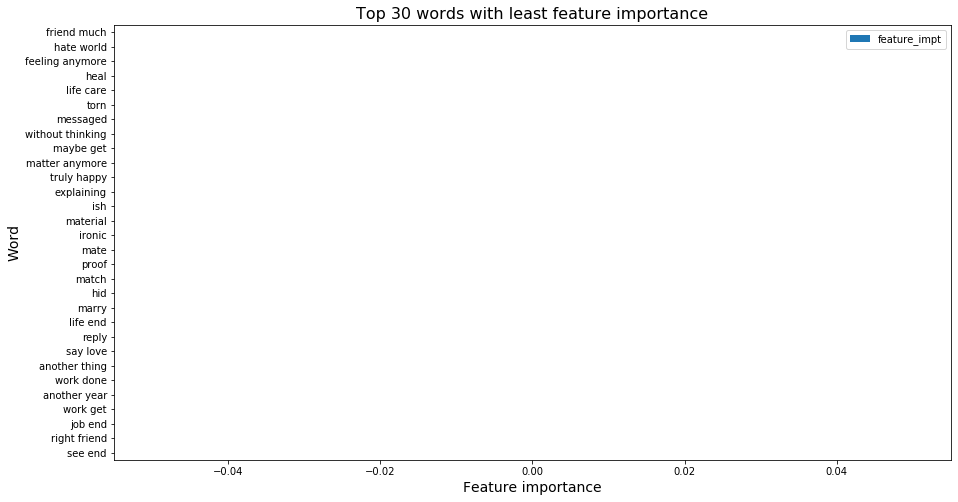

In [140]:
#plot bar chart with 30 words with lowest feature importance
bottom_30 = feat_df.sort_values(by = 'feature_impt')[:30]
bottom_30[::-1].plot.barh('word', figsize=(15,8))
plt.title ('Top 30 words with least feature importance', fontsize=16)
plt.xlabel('Feature importance', fontsize = 14)
plt.ylabel('Word', fontsize = 14);

In [139]:
bottom_30

,word,feature_impt
1516,friend much,0.0
1889,hate world,0.0
1378,feeling anymore,0.0
1899,heal,0.0
2393,life care,0.0
4397,torn,0.0
2702,messaged,0.0
4790,without thinking,0.0
2652,maybe get,0.0
2642,matter anymore,0.0


- Printing the top and bottom values, we see that the top words which have the largest positive values are:
    1. kill : As the word count of 'kill' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 0.7%
    2. die : As the word count of 'die' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 0.5%
    3. feeling : As the word count of 'feeling' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 0.4%
    4. sometimes: As the word count of 'sometimes' increases by 1, the probability of the model classifying the post under r/SuicidalWatch increases by 0.3%


- These words have the least predictive power in having the model classifying the probability of a post being labelled 'is_suicidal'. 
    
    1. On the contrary, these words have the least/no predictive power in being assigned to r/SuicidalWatch :"see end","right friend","job end"

### Extra Trees Conclusion

- ExtraTrees might not be the best model when compared to MultiNB in terms of scoring, but it still yields same prediction conclusion, ie concluding that extreme words belong to r/SuicideWatch and more contextual, story-based words to r/depression

# Choosing a Production Model

In [64]:
results_df

,model,features_matrix,optimised_params,train_score,test_score,confusion_matrix,sensitivity,precision,train_f1,test_f1
0,cvec + logistic regression,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 3), 'lr__C': 0.1, 'lr__penalty': 'l2'}",0.942059,0.646939,"tn: 154, fp: 89, fn: 84, tp: 163",0.659919,0.646825,0.943968,0.653307
1,tvec + logistic regression,selftext_title_clean,"{'lr__C': 0.021544346900318822, 'lr__penalty': 'l2', 'tvec__max_df': 0.85, 'tvec__max_features': 3000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.770279,0.634694,"tn: 120, fp: 123, fn: 56, tp: 191",0.773279,0.608280,0.796620,0.680927
2,cvec + multi nb,selftext_title_clean,"{'cvec__max_df': 0.85, 'cvec__max_features': 2000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2)}",0.813224,0.659184,"tn: 155, fp: 88, fn: 79, tp: 168",0.680162,0.656250,0.822078,0.667992
3,tvec + multi nb,selftext_title_clean,"{'tvec__max_df': 0.85, 'tvec__max_features': 2000, 'tvec__min_df': 3, 'tvec__ngram_range': (1, 1)}",0.853442,0.673469,"tn: 154, fp: 89, fn: 71, tp: 176",0.712551,0.664151,0.859201,0.687500
4,cvec + extra trees,selftext_title_clean,"{'cvec__max_df': 0.95, 'cvec__max_features': 5000, 'cvec__min_df': 4, 'cvec__ngram_range': (1, 2), 'et__n_estimators': 110}",0.996592,0.618367,"tn: 163, fp: 80, fn: 107, tp: 140",0.566802,0.636364,0.996610,0.599572
5,tvec + extra trees,selftext_title_clean,"{'et__n_estimators': 110, 'tvec__max_df': 0.9, 'tvec__max_features': 4000, 'tvec__min_df': 4, 'tvec__ngram_range': (1, 3)}",0.996592,0.648980,"tn: 172, fp: 71, fn: 101, tp: 146",0.591093,0.672811,0.996610,0.629310


- Looking at the results, TVEC and MultiNB yields the highest score in f1 and accuracy

# Analyzing our Best Model

### Strongest Word Predictors

In [74]:
#finding coefficients of 20 most siginificant features from model 
coefs = best_gstvnb.named_steps['nb'].coef_

features = best_gstvnb.named_steps['tvec'].get_feature_names()

coef_df = pd.DataFrame({'word':features, 'coef':coefs[0]})

#words with largest positive coefficient values 
top_20 = coef_df.sort_values(by = 'coef', ascending = False)[0:20]

#words with largest negative coefficient values 
bottom_20 = coef_df.sort_values(by = 'coef')[:20]

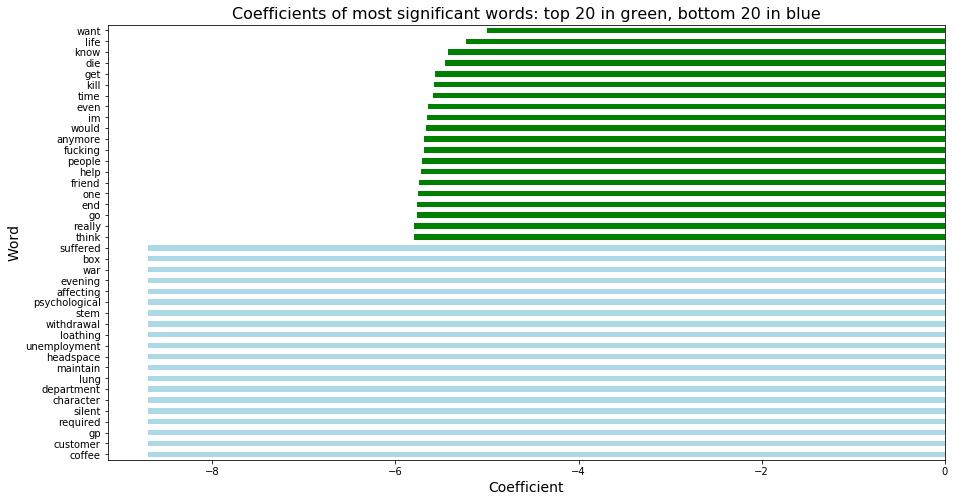

In [75]:
#plot bar chart with 20 words with largest coefficient values and 20 words with smallest coefficient values 
top_bottom_20 = pd.concat([bottom_20, top_20.sort_values(by = 'coef')], axis =0)

top_bottom_20.plot.barh('word', color=([np.where(top_bottom_20['coef']< -6, 'lightblue', 'green')]), 
                        figsize=(15,8))
plt.title('Coefficients of most significant words: top 20 in green, bottom 20 in blue', fontsize=16)
plt.xlabel('Coefficient', fontsize = 14)
plt.ylabel('Word', fontsize = 14)
plt.gca().legend_.remove();

In [67]:
bottom_20

,word,coef
319,coffee,-8.707478
415,customer,-8.707478
758,gp,-8.707478
1455,required,-8.707478
1578,silent,-8.707478
279,character,-8.707478
456,department,-8.707478
1063,lung,-8.707478
1070,maintain,-8.707478
817,headspace,-8.707478


Printing out WordClouds based on the highest predictive words from our model, it shows dark emotive words from our r/SuicideWatch thread. More story-based words such as 'coffee' 'department' appears in r/depression thread.

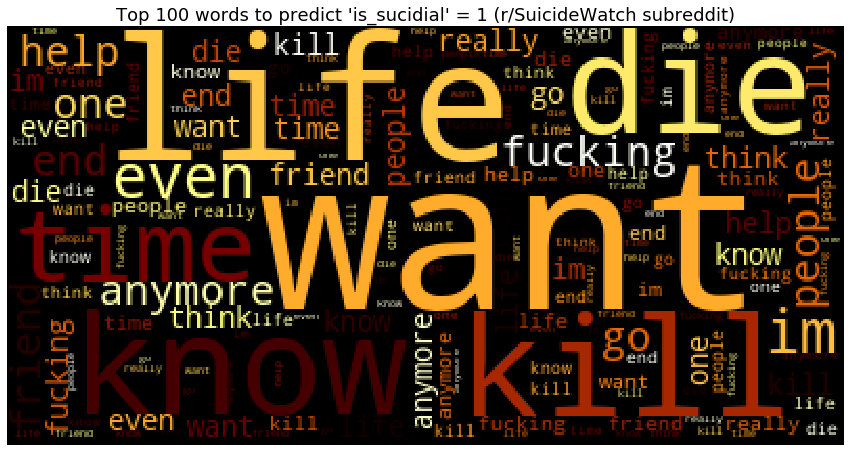

In [90]:
# Wordcloud visualising top 100 words to predict is_sucidial = 1

top_100 = coef_df.sort_values(by = 'coef', ascending = False)[0:100]


wordcloud = WordCloud(repeat=True, collocations=False,
                      min_font_size=5, max_font_size= 100,
                      background_color= "black",
                      colormap='afmhot').generate(top_20['word'].to_string())
                                                                                            
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, )
plt.axis("off")
plt.title("Top 100 words to predict 'is_sucidial' = 1 (r/SuicideWatch subreddit)", fontsize= 18);

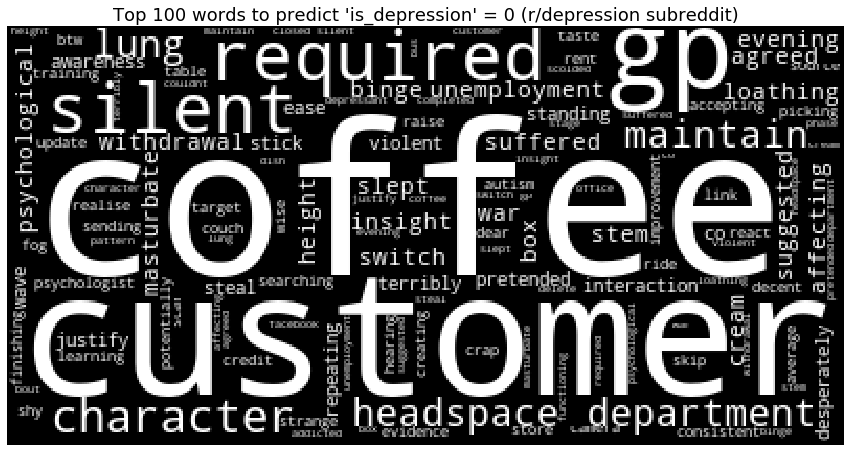

In [78]:
#Wordcloud visualising top 100 words to predict is_depression = 0 

bottom_100 = coef_df.sort_values(by = 'coef')[0:100] 

wordcloud = WordCloud(repeat=True, collocations=True,
                      min_font_size=5, max_font_size= 100, 
                      background_color= "black", 
                      color_func=lambda *args, **kwargs: "white").generate(bottom_100['word'].to_string())
                                                                                            
plt.figure(figsize=[15,8])
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top 100 words to predict 'is_depression' = 0 (r/depression subreddit)", fontsize= 18);

### Misclassified Data

In this section, we want to look at where our model fails.

In [121]:
#building a dataframe called 'mislabels' to store all our misclassified data
mislabels = model_1k.loc[y_test.index,:]

In [123]:
# Insert a column for the predictions
mislabels['pred'] = tvnbpreds

,selftext_cleaned,title_cleaned,selftext_title_clean,is_suicidal,pred
1384,need vent today online zoom discussion mental health brought negative stigma medication mental health personal shame people sometimes feel internally externally take medication personally felt lot shame take medication sometimes others tried stopping never worked well sometimes wonder something wrong trying hard enough better accepting fact may antidepressant rest life considering mom grandma also taking antidepressant decade antidepressant thing cured prove point negative stigma classmate responds saying agrees antidepressant also supposed temporary fix cure partially agree case medication need used temporarily made feel personally invalidated understand personal properly educated specific topic stop ruminating said luckily another student quickly corrected sometimes medication lifelong thing wish people understood difference situational clinical,one classmate said medication supposed temporary fix upset,need vent today online zoom discussion mental health brought negative stigma medication mental health personal shame people sometimes feel internally externally take medication personally felt lot shame take medication sometimes others tried stopping never worked well sometimes wonder something wrong trying hard enough better accepting fact may antidepressant rest life considering mom grandma also taking antidepressant decade antidepressant thing cured prove point negative stigma classmate responds saying agrees antidepressant also supposed temporary fix cure partially agree case medication need used temporarily made feel personally invalidated understand personal properly educated specific topic stop ruminating said luckily another student quickly corrected sometimes medication lifelong thing wish people understood difference situational clinical one classmate said medication supposed temporary fix upset,0,0
1542,completely broke would still job walmart could k saved much really hard finding job take long time keep applying million place apply applied walmart month ago failed assessment feel like applying every else account put application stupidest shit really really feel like applying place energy shit motivation sick tired people getting job waaaaaaaay easier want go college spring probably able diploma home school teach mom even started transcript need make diploma official transcript diploma useless know want job go college spring may happen want go college graduate thing right try find job keep reminding mom transcript,motivation look job,completely broke would still job walmart could k saved much really hard finding job take long time keep applying million place apply applied walmart month ago failed assessment feel like applying every else account put application stupidest shit really really feel like applying place energy shit motivation sick tired people getting job waaaaaaaay easier want go college spring probably able diploma home school teach mom even started transcript need make diploma official transcript diploma useless know want job go college spring may happen want go college graduate thing right try find job keep reminding mom transcript motivation look job,0,0
1039,felt every day felt like wanted end thankful truth hard hated hated everyone else hated world tired sleepy time able concentrate anything made talking right cheer know within make believe,story,felt every day felt like wanted end thankful truth hard hated hated everyone else hated world tired sleepy time able concentrate anything made talking right cheer know within make believe story,0,0
1862,wanna die feel like stuck way lonely life absolutely worthless want live anymore point talking bout anyone anymore coz nobody anything cure taken therapy medication seen psychologist several time even back feeling pain intensity nothing changed end come back vicious circle idk get anymore tf supposed live way hope get covid die venting place person vent,hate life,wanna die feel lik

In [124]:
# Create a column that indicates if the post was correctly classified or not
mislabels['correctly_classified'] = (mislabels['pred']==mislabels['is_suicidal'])

In [128]:
# We have 160 misclassified posts
mislabels[mislabels['correctly_classified']==False].shape

(160, 6)

In [142]:
#mislabels are around 33%
(mislabels[mislabels['correctly_classified']==False].shape[0])/(len(y_test))

0.32653061224489793

In conclusion, even as a human examiner (myself), looking at the misclassified posts, it is quite hard for me to ascertain where my model has gone wrong. 

- While my model is able to predict longer, story-like posts as non-sucidal(which is the expected behaviour), as I read through the misclassified post, I could not pinpoint a section where it is distintively suicidal. S(eg, Post index 864)
- On the other hand, looking at depressed posts wrongly classified as suicidal, I can also understand why my model predicted it to be suicidal as the post are shorter and also express very bleak and dark emotions (eg, Post index 1334 where it describe a suicide scenario, and the model predicted it Suicidal, but the post was actually under r/depression )

In [130]:
# View the first 5 misclassified posts
mislabels[mislabels['correctly_classified']==False].head()

,selftext_cleaned,title_cleaned,selftext_title_clean,is_suicidal,pred,correctly_classified
1334,girlfriend attempted three time survived still badly med work spends day without sleep good since past month cut also recognise thing proud feel worthless try tell amazing often try mke understand brave going nothing work way better communicating make feel better,trying best think anything,girlfriend attempted three time survived still badly med work spends day without sleep good since past month cut also recognise thing proud feel worthless try tell amazing often try mke understand brave going nothing work way better communicating make feel better trying best think anything,0,1,False
864,tried make post webpage crashed save draft pouring heart likely tired continue post feel like somehow release something even though read fake personality includes peer family member leading onto losing desire goal purpose live since even know use bright child parent would go fight able help get always optimistic caring loveable cute always considerably popular even great friend grow continue fake personality grown repetition people rather expect work always right great advice give people answer recently going downhill stigma still many people know name cant live anymore feel subjected feel like part reason highschool led expand sad thought could also lack serotonin since hard knot upon shoulder cause chronic pain also cause migraine tension headache young age many people around trying figure positive attitude towards future truly wonder friend cause recently debate jokingky insert none emotion would subjected friend stated result dying since solve pain knowing life struggle school work trying optimistic touched base reproduction basically future generation hopefully find answer many unsolvable question today work rebutted benfit agreed however harshly stated stick one passion rather perspective person also wonder stick one passion passion like see one friend dream fashion designer influence career test parent want doctor question whether choice said yes really think even based friend opinion agreement within led loneliness entirely fault felt way forever x b im tired goodnight text rather energy inputted deleted one hope able release something write stuff feel negative sad peace reddit ofc future self read,log,tried make post webpage crashed save draft pouring heart likely tired continue post feel like somehow release something even though read fake personality includes peer family member leading onto losing desire goal purpose live since even know use bright child parent would go fight able help get always optimistic caring loveable cute always considerably popular even great friend grow continue fake personality grown repetition people rather expect work always right great advice give people answer recently going downhill stigma still many people know name cant live anymore feel subjected feel like part reason highschool led expand sad thought could also lack serotonin since hard knot upon shoulder cause chronic pain also cause migraine tension headache young age many people around trying figure positive attitude towards future truly wonder friend cause recently debate jokingky insert none emotion would subjected friend stated result dying since solve pain knowing life struggle school work trying optimistic touched base reproduction basically future generation hopefully find answer many unsolvable question today work rebutted benfit agreed however harshly stated stick one passion rather perspective person also wonder stick one passion passion like see one friend dream fashion designer influence career test parent want doctor question whether choice said yes really think even based friend opinion agreement within led loneliness entirely fault felt way forever x b im tired goodnight text rather energy inputted deleted one hope able release something write stuff feel negative sad peace reddit ofc future self read log,1,0,False
765,exactly way keep t

# Conclusion

Humans are inscrutable, undeniably and infinitely unpredictable. 

It is clear that no one (machines and human) are able to 100% correctly predict what intentions and next actions they are going to take. 

However, we can prove that with help of a model, we can increase that accuracy from 50.43% to 67.34%. Using modelling, we are able to skin down the volume of posts to more crucial ones where then a human ear and willing heart are best detectors in accessing if the author is truly depressed or suicidal.